In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks")
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [3]:
# Electricity load data
elec_load_df = pd.read_csv('../data/electricity/elc_load_hourly_20190601_ercot.csv')

# Solar gen data
solar_gen_df = pd.read_csv('../data/solar/solar_gen_hourly_20190601_ercot.csv')

In [4]:
elec_load_df = elec_load_df[['DeliveryDate', 'HourEnding', 'ActualLoad']]
elec_load_df.columns = ['Date', 'Hour', 'Load']

solar_gen_df = solar_gen_df[['DELIVERY_DATE', 'HOUR_ENDING', 'ACTUAL_SYSTEM_WIDE']]
solar_gen_df.columns = ['Date', 'Hour', 'SolarGen']

In [5]:
merged_df = elec_load_df.merge(solar_gen_df, on = ['Date', 'Hour']).query('Date == "6/1/2019"')
merged_df.head()

,Date,Hour,Load,SolarGen
0,6/1/2019,1.0,40423.17,0.0
1,6/1/2019,2.0,38009.09,0.0
2,6/1/2019,3.0,36252.61,0.0
3,6/1/2019,4.0,35201.89,0.0
4,6/1/2019,5.0,34733.64,0.0


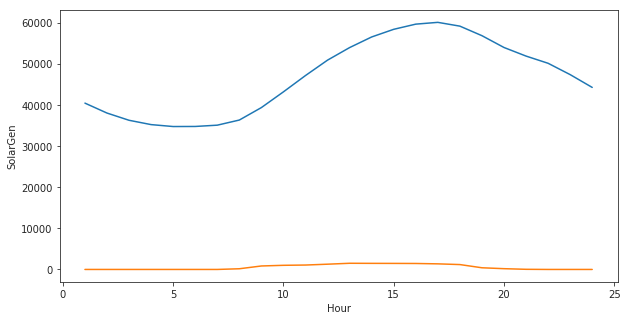

In [6]:
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = 'Hour', y = 'Load', data = merged_df)
sns.lineplot(x = 'Hour', y = 'SolarGen', data = merged_df.query('Date == "6/1/2019"'))

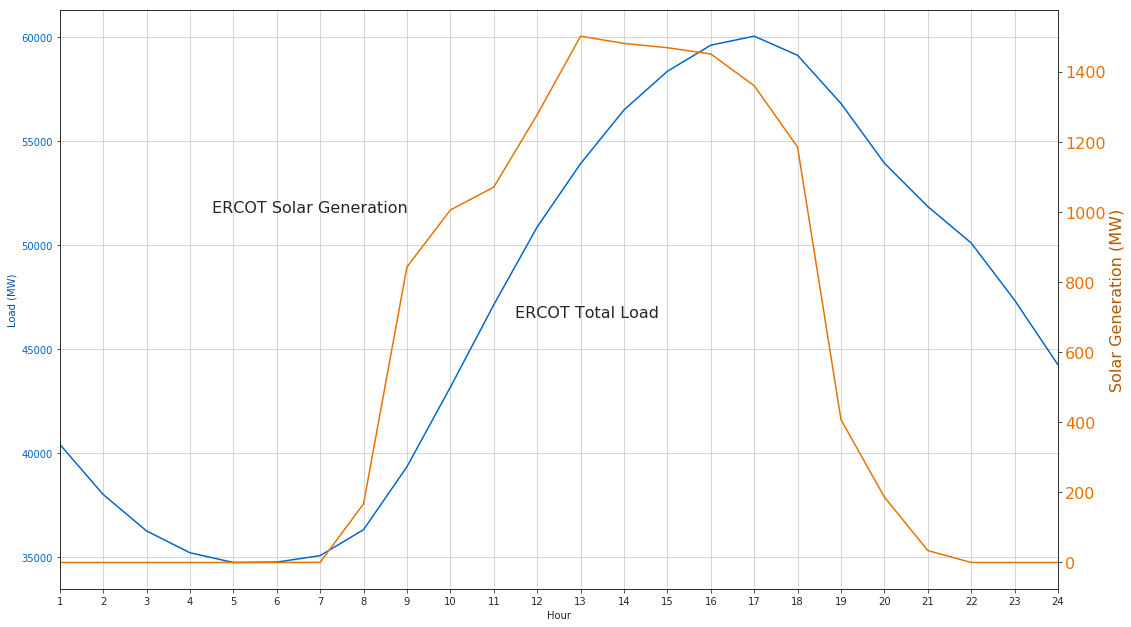

In [7]:
fig, ax1 = plt.subplots(figsize = (16,9))
plt.rcParams.update({'font.size': 16})

color = '#0066cc'
ax1.set_xlabel('Hour')
ax1.set_ylabel('Load (MW)', color='#004d99')
ax1.plot(merged_df['Hour'], merged_df['Load'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#e67300'
ax2.set_ylabel('Solar Generation (MW)', color='#b35900')  # we already handled the x-label with ax1
ax2.plot(merged_df['Hour'], merged_df['SolarGen'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(1)
plt.xlim(1,24)
plt.xticks(merged_df['Hour'])

plt.text(4.5, 1000, 'ERCOT Solar Generation', fontsize = 16)
plt.text(11.5, 700, 'ERCOT Total Load', fontsize = 16)

fig.tight_layout()
plt.show()

In [8]:
merged_df['is_peak'] = merged_df['Hour'].apply(lambda x: (x > 9) and (x <24))
merged_df.groupby('is_peak')['SolarGen'].sum()/merged_df['SolarGen'].sum()

is_peak
False    0.075211
True     0.924789
Name: SolarGen, dtype: float64

In [9]:
merged_df.groupby('is_peak')['Load'].sum()/merged_df['Load'].sum()

is_peak
False    0.333281
True     0.666719
Name: Load, dtype: float64

In [10]:
np.array([1, 0.1])/1.1

array([0.90909091, 0.09090909])

In [12]:
merged_df.to_csv('../data/processed/ercot_load_solar.csv', index = False)